FAKE NEWS DETECTION

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Assume your trained model variable is called `model`



In [57]:
data_fake = pd.read_csv("D:\\fake-news-detector (2)\\fake-news-detector\\data\\Fake.csv")
data_true = pd.read_csv("D:\\fake-news-detector (2)\\fake-news-detector\\data\\True.csv")

In [58]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [59]:
data_true.tail()

,title,text,subject,date
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"
21417,"""Need Of The Hour"": Delhi Government Writes To...",The Delhi government has requested the centre ...,worldnews,"November 19, 2024"


In [60]:
data_fake["class"]=0
data_true['class']=1

In [61]:
data_fake.shape, data_true.shape

((23481, 5), (21418, 5))

In [62]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [63]:
data_fake.shape, data_true.shape

((23471, 5), (21408, 5))

In [64]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\hanni\AppData\Local\Temp\ipykernel_9452\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\hanni\AppData\Local\Temp\ipykernel_9452\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [65]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [66]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1
21417,"""Need Of The Hour"": Delhi Government Writes To...",The Delhi government has requested the centre ...,worldnews,"November 19, 2024",1


In [67]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [68]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [69]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [70]:
#count of missing values
data.isnull().sum()

text     0
class    0
dtype: int64

Randomly shuffling the dataframe

In [71]:
data = data.sample(frac = 1)

In [72]:
data.head()

,text,class
4317,WASHINGTON (Reuters) - Opponents of a proposal...,1
3307,Walmart may be discontinuing the sale of Black...,0
19819,LIMA (Reuters) - Peruvian President Pedro Pabl...,1
13499,Who better to protect Trump supporters than bi...,0
14773,Isn t it a conflict of interest that Clinton i...,0


In [73]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [74]:
data.columns

Index(['text', 'class'], dtype='object')

In [75]:
data.head()

,text,class
0,WASHINGTON (Reuters) - Opponents of a proposal...,1
1,Walmart may be discontinuing the sale of Black...,0
2,LIMA (Reuters) - Peruvian President Pedro Pabl...,1
3,Who better to protect Trump supporters than bi...,0
4,Isn t it a conflict of interest that Clinton i...,0


Preprocessing Text

In [76]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hanni\AppData\Local\Temp\ipykernel_9452\1003490320.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\hanni\AppData\Local\Temp\ipykernel_9452\1003490320.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+','',text)
C:\Users\hanni\AppData\Local\Temp\ipykernel_9452\1003490320.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


In [77]:
data['text'] = data['text'].apply(wordopt)

Defining dependent and independent variable as x and y

In [78]:
x = data['text']
y = data['class']

Training the model

Splitting the dataset into training set and testing set.

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

### Extracting Features from the Text

#### Convert text to vectors

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

##  Decision Tree algorithm Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
import joblib
# Initialize the Decision Tree model
dt = DecisionTreeClassifier()
joblib.dump(dt, 'model.pkl')
joblib.dump(vectorization, 'vectorizer.pkl')
# Train the model
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [82]:
# Make predictions on the test set
pred_dt = dt.predict(xv_test)


In [83]:
# Evaluate the model
dt_score = accuracy_score(y_test, pred_dt)
print(f"Decision Tree Accuracy Score: {dt_score}")
print(classification_report(y_test, pred_dt))

Decision Tree Accuracy Score: 0.9959001782531194
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5905
           1       1.00      0.99      1.00      5315

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Logistic Regression Classifier

In [84]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model
lr.fit(xv_train, y_train)


LogisticRegression()

In [85]:
# Make predictions on the test set
pred_lr = lr.predict(xv_test)

In [86]:
# Evaluate the model
lr_score = accuracy_score(y_test, pred_lr)
print(f"Logistic Regression Accuracy Score: {lr_score}")
print(classification_report(y_test, pred_lr))

Logistic Regression Accuracy Score: 0.9858288770053476
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5905
           1       0.98      0.99      0.99      5315

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Gradient Boost Classifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier()

# Train the model
gbc.fit(xv_train, y_train)



GradientBoostingClassifier()

In [88]:
# Make predictions on the test set
pred_gbc = gbc.predict(xv_test)

In [89]:

#Evaluate the model
gbc_score = accuracy_score(y_test, pred_gbc)
print(f"Gradient Boosting Classifier Accuracy Score: {gbc_score}")
print(classification_report(y_test, pred_gbc))

Gradient Boosting Classifier Accuracy Score: 0.9957219251336898
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5905
           1       0.99      1.00      1.00      5315

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rfc = RandomForestClassifier(random_state=0)

# Train the model
rfc.fit(xv_train, y_train)


In [ ]:
# Make predictions on the test set
pred_rfc = rfc.predict(xv_test)

In [ ]:
# Evaluate the model
rfc_score = accuracy_score(y_test, pred_rfc)
print(f"Random Forest Classifier Accuracy Score: {rfc_score}")
print(classification_report(y_test, pred_rfc))

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(xv_train, y_train)

In [ ]:
# Make predictions on the test set
pred_nb = nb.predict(xv_test)

In [ ]:
# Evaluate the model
nb_score = accuracy_score(y_test, pred_nb)
print(f"Naive Bayes Accuracy Score: {nb_score}")
print(classification_report(y_test, pred_nb))

In [ ]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dt.predict(new_xv_test)
    pred_GB = gbc.predict(new_xv_test)
    pred_RF = rfc.predict(new_xv_test)
    pred_NB = nb.predict(new_xv_test)
   



    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGB Prediction: {}\nRF Prediction: {}\nNB Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                            output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0]),
                                                                                                             output_lable(pred_NB[0]),

                                                                                                            ))

In [ ]:
text=input("Enter the news to be tested: ")
manual_testing(text)


In [ ]:
a=pd.read_csv("D:\\fake-news-detector (2)\\fake-news-detector\\data\\ACCURACY.csv")

In [ ]:
print(a)

             ALGORITHM  PRECISION  RECALL  F1SCORE  ACCURACY
0        DECISION TREE        100     100      100       100
1        RANDOM FOREST         99      99       99        99
2    GRADIENT BOOSTING         99     100       99       100
3  LOGISTIC REGRESSION         98      99       99        99
4          NA?VE BAYES         94      92       93        93


## ACCURACY GRAPH 

Text(0, 0.5, 'PRECISION')

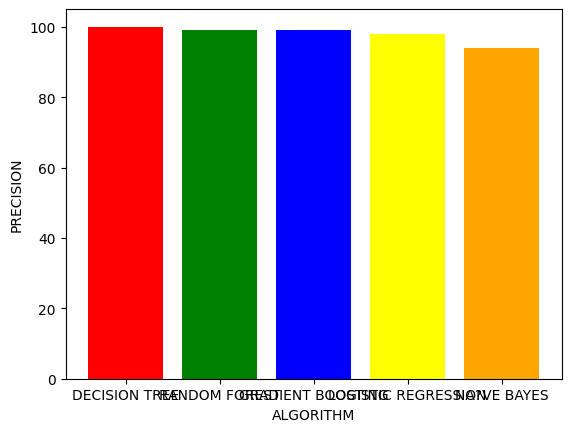

In [ ]:
plt.bar(a.ALGORITHM,a.PRECISION,color=("red",'green','blue','yellow','orange'))
plt.xlabel("ALGORITHM")
plt.ylabel("PRECISION")

Text(0, 0.5, 'RECALL')

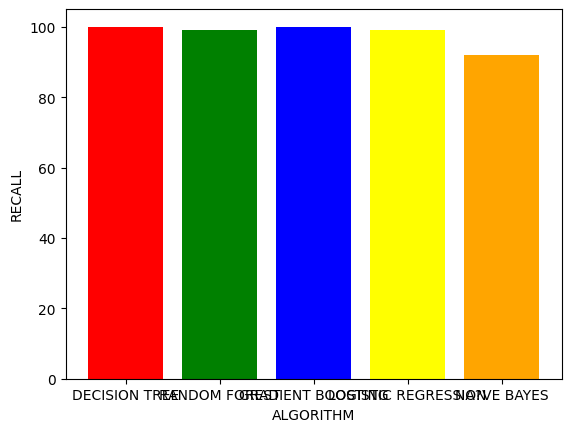

In [ ]:
plt.bar(a.ALGORITHM,a.RECALL,color=("red",'green','blue','yellow','orange'))
plt.xlabel("ALGORITHM")
plt.ylabel("RECALL")

Text(0, 0.5, 'F1SCORE')

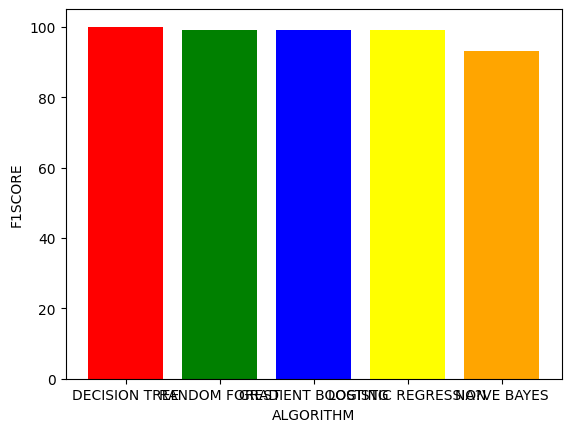

In [ ]:
plt.bar(a.ALGORITHM,a.F1SCORE,color=("red",'green','blue','yellow','orange'))
plt.xlabel("ALGORITHM")
plt.ylabel("F1SCORE")

Text(0, 0.5, 'ACCURACY')

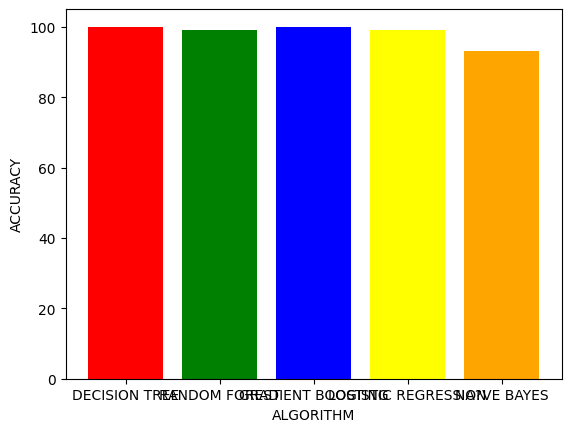

In [ ]:
plt.bar(a.ALGORITHM,a.ACCURACY,color=("red",'green','blue','yellow','orange'))
plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY")